### Today:
* Multiclass classification
* Softmax regression
    * Model
    * Cost function
    * Optimization

### Resources:
* Softmax regression: https://mcerovic.github.io/notes/SoftmaxRegression/index.html
* Softmax regression: http://ufldl.stanford.edu/wiki/index.php/Softmax_Regression
* Softmax function: https://medium.com/@uniqtech/understand-the-softmax-function-in-minutes-f3a59641e86d
* Multiclass classification: Patternt Recognition and Machine Learning - Bishop

# Softmax regression

In [6]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.reset_default_graph()

In [10]:
# Load dataset as numpy array
data = np.loadtxt('../../data/04_SoftmaxRegression/sr_data.csv', delimiter=',')

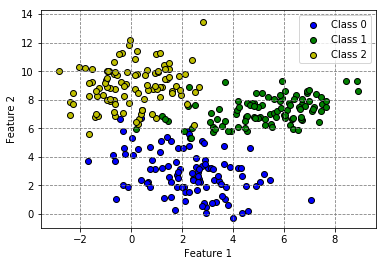

In [21]:
# Find index of samples with class 0
idx_0 = data[:, 2] == 0.0
idx_1 = data[:, 2] == 1.0
idx_2 = data[:, 2] == 2.0

# Plot dataset
fig, ax = plt.subplots()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.scatter(data[idx_0][:, 0], data[idx_0][:,1], c='b', edgecolors='k', label='Class 0')
ax.scatter(data[idx_1][:, 0], data[idx_1][:,1], c='g', edgecolors='k', label='Class 1')
ax.scatter(data[idx_2][:, 0], data[idx_2][:,1], c='y', edgecolors='k', label='Class 2')
ax.grid(True, color='gray', linestyle='dashed')
ax.legend()

In [22]:
# Data parameters
n_features = 2
n_labels = 3
train_size = len(data)
train_split = 0.85 # 85% data in train set, 15% in test set
split = int(train_split * train_size) # Split boundry, check for yourself!

# Training parameters
learning_rate = 0.01
training_epochs = 5000
batch_size = 100

In [23]:
# Split dataset on features and labels
x_data = data[:, :2]
print(data[:4, 2]) # y_data

y_data = tf.one_hot(data[:, 2], n_labels, dtype=tf.uint8)
# Softmax accepts labels as one hot tensor
# https://www.tensorflow.org/api_docs/python/tf/one_hot

sess = tf.Session()
print(sess.run(y_data[:4]))
sess.close()

# Split data on training and test 
x_train, x_test = x_data[:split], x_data[split:]
y_train, y_test = y_data[:split], y_data[split:]

[2. 0. 1. 2.]
[[0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]]


## Model

In [24]:
X = tf.placeholder(tf.float32, [None, n_features], "X")
y = tf.placeholder(tf.float32, [None, n_labels], "y")

W = tf.Variable(tf.random_normal([n_features, n_labels]), name="W")
b = tf.Variable(tf.random_normal([n_labels]), name="b")

In [25]:
hypothesis = tf.nn.softmax(tf.add(tf.matmul(X, W), b))

## Cost

In [27]:
cost = -tf.reduce_mean(tf.reduce_sum(tf.multiply(y, tf.log(hypothesis)), axis=1))

## Optimization

In [28]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Train

In [29]:
corr_pred = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(corr_pred, "float"))

In [30]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    # 5000 * 300 / 100 = 15000
    for step in range(training_epochs * train_size // batch_size):
        
        offset = (step * batch_size) % train_size
        
        batch_data = x_train[offset:(offset + batch_size)]
        
        # feed_dict cannot use Tensor so we have to 
        # evaluete our y_train and y_test tensors
        batch_labels = y_train.eval()[offset:(offset + batch_size)]
        
        
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_data, y: batch_labels})
        
        
        if step % 100 == 0:
            print(step, err)
            
    print('acc', sess.run(acc, feed_dict={X: x_test, y: y_test.eval()}))

0 2.066874
100 0.8216946
200 0.5264254
300 0.54904884
400 0.5522057
500 0.44962776
600 0.4823578
700 0.48912174
800 0.40060213
900 0.4401185
1000 0.4437672
1100 0.36374497
1200 0.40816364
1300 0.40870568
1400 0.3351144
1500 0.38293296
1600 0.38076556
1700 0.31229022
1800 0.36248097
1900 0.3580047
2000 0.2937023
2100 0.34556252
2200 0.3391236
2300 0.27828434
2400 0.3313302
2500 0.3232166
2600 0.2652902
2700 0.3191851
2800 0.3096335
2900 0.2541852
3000 0.30869266
3100 0.29789773
3200 0.24457774
3300 0.29953066
3400 0.28765285
3500 0.23617634
3600 0.29145455
3700 0.2786273
3800 0.22875957
3900 0.28427655
4000 0.2706112
4100 0.22215693
4200 0.2778494
4300 0.2634399
4400 0.21623556
4500 0.27205682
4600 0.25698256
4700 0.21088982
4800 0.2668053
4900 0.25113416
5000 0.20603515
5100 0.26201877
5200 0.24580903
5300 0.20160304
5400 0.2576351
5500 0.24093731
5600 0.19753735
5700 0.25360283
5800 0.23646094
5900 0.19379167
6000 0.24987894
6100 0.23233147
6200 0.19032718
6300 0.24642728
6400 0.22850